In [1]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

apples = pd.read_csv('data/apple_quality.csv')
apples.head(16)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [2]:
print(apples.describe())

              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.503445     0.022609  
75% 

In [3]:
print(apples.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB
None


<Axes: >

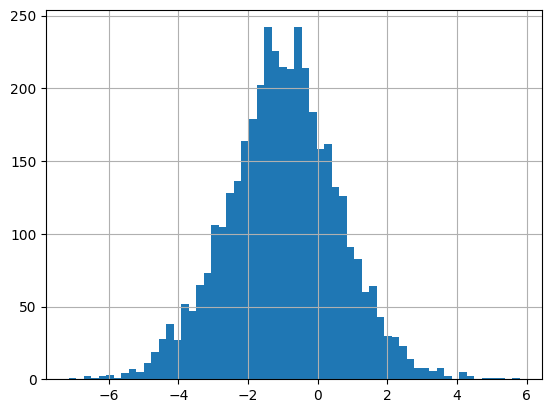

In [4]:
apples['Weight'].hist(bins=60)

<Axes: >

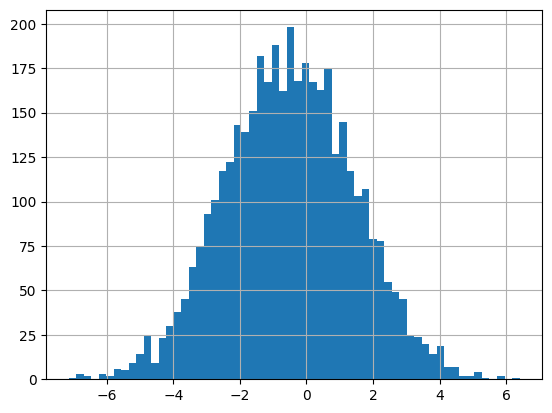

In [5]:
apples['Size'].hist(bins=60)

<Axes: >

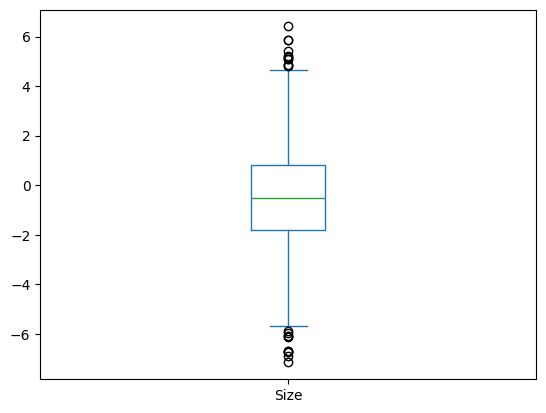

In [6]:
apples['Size'].plot.box()

In [7]:
maps = {
    'good': 1,
    'bad': 0
}
apples['Quality'] = apples ['Quality'].apply(lambda x: maps[x])
print(apples)

      A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...    ...       ...       ...        ...          ...        ...       ...   
3995  3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  Quality  
0    -0.491590        1  

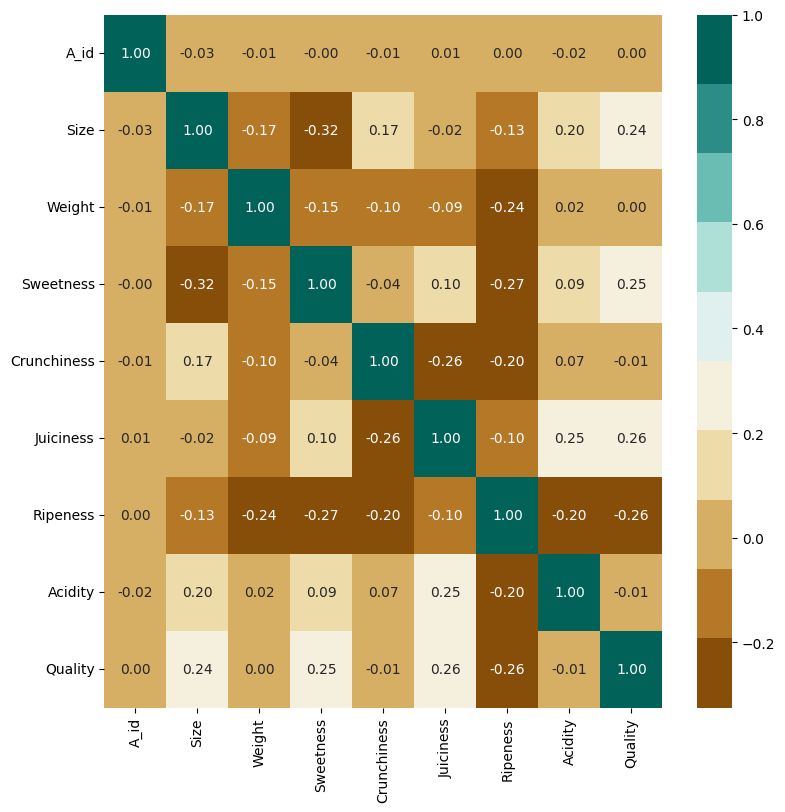

In [8]:
correlations = apples.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(9, 9))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(correlations.columns);

plt.show()

In [9]:
X = apples.drop('Quality', axis=1).to_numpy()
X

array([[ 0.00000000e+00, -3.97004852e+00, -2.51233638e+00, ...,
         1.84490036e+00,  3.29839797e-01, -4.91590483e-01],
       [ 1.00000000e+00, -1.19521719e+00, -2.83925653e+00, ...,
         8.53285795e-01,  8.67530082e-01, -7.22809367e-01],
       [ 2.00000000e+00, -2.92023862e-01, -1.35128199e+00, ...,
         2.83863551e+00, -3.80333280e-02,  2.62163647e+00],
       ...,
       [ 3.99700000e+03, -2.63451530e+00, -2.13824672e+00, ...,
         2.19970859e+00,  4.76385918e+00, -1.33461139e+00],
       [ 3.99800000e+03, -4.00800374e+00, -1.77933711e+00, ...,
         2.16143512e+00,  2.14488384e-01, -2.22971981e+00],
       [ 3.99900000e+03,  2.78539650e-01, -1.71550503e+00, ...,
         1.26667740e+00, -7.76571470e-01,  1.59979646e+00]])

In [10]:
y = apples.loc[:, 'Quality'].to_numpy()
y

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [11]:
# split data for training model and validation K = 4 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) 

In [12]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    # generate labels for validation set
    predictions = classifier.predict(feature_vector_valid)
    
    # evealuate model based on test set labels
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [15]:
def train_model(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


accuracy = train_model(model, X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print("LR Accuracy: ", accuracy)

NameError: name 'model' is not defined

In [16]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

NameError: name 'accuracy_score' is not defined

In [ ]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

In [17]:
# compare models
df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

NameError: name 'accuracy_compare' is not defined

In [ ]:
# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

In [ ]:
# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)